# <font size=6 color='green'><center>**IT 496 - Introduction to Data Mining**</center></font>
### **<center>Course Project - 01<br/><br/>Data Preprocessing, EDA and Regression Analysis<center>**

 &emsp; **Group Name : <font color='#0099ff'>DataForce</font>** <br/>
 &emsp; **Group ID : <font color='#0099ff'>T06</font>**
 <br/>&emsp; **Dateset : <font color='#0099ff'>EV Charging Station</font>**

### <center>Introduction </center>

**Dataset Name**: Electric Vehicle(EV) Charging station<br/><br/>
The EV Charging Station dataset provides the availability, use, and demand for EV charging facilities, which helps researchers, analysts, and businesses better understand the regional EV industry and sustainable transportation methods.Information on charging station locations, available charging connector types, charging session lengths, energy usage, and other pertinent metrics are all included in the data. 
<br/><br/>
**Use**: To provide comprehensive insights into the usage patterns of Electric Vehicle(EV) charging stations in the city of Palo Alto, California<br/>

**Dataset Link**: https://www.kaggle.com/datasets/venkatsairo4899/ev-charging-station-usage-of-california-city

### <center>Exploratory Data Analysis(EDA)</center>

**T1.** Explore the dataset assigned to your team and provide:


$a$. A summary of the dataset (should include information columns present, attribute
types, null values, and a summary of each attribute).

$b$. Data Visualization, summarizing insights about the dataset through EDA.

In [33]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
# temporary, just to load dataset
data = pd.read_csv(r"C:\Users\Rishit Shah\Documents\Semester 7\Introduction to Data Mining\Course Project 1\archive (1)\EVChargingStationUsage.csv",low_memory=False)

In [3]:
data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN


In [4]:
data.shape

(259415, 33)

In [5]:
data.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [6]:
data.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [9]:
data.nunique()

Station Name                           47
MAC Address                            83
Org Name                                2
Start Date                         244798
Start Time Zone                         3
End Date                           244159
End Time Zone                           3
Transaction Date (Pacific Time)    240905
Total Duration (hh:mm:ss)           31025
Charging Time (hh:mm:ss)            22473
Energy (kWh)                       118061
GHG Savings (kg)                    15535
Gasoline Savings (gallons)           6333
Port Type                               2
Port Number                             2
Plug Type                               2
EVSE ID                                51
Address 1                              20
City                                    1
State/Province                          1
Postal Code                             3
Country                                 1
Latitude                               62
Longitude                         

As we can see, there are certain columns like City, State and Country which have only a single value for all entries. Hence, these columns are not much useful for any analysis.

Box Plots

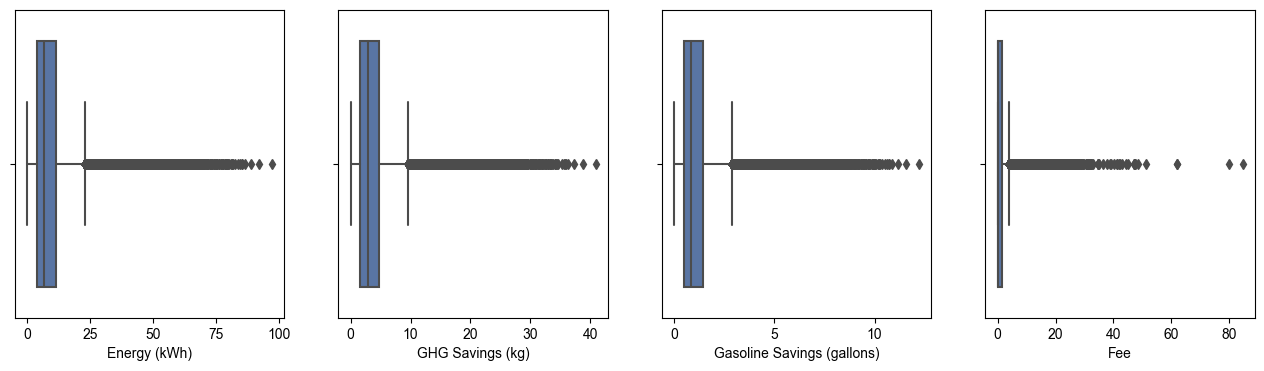

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Energy (kWh)", "GHG Savings (kg)", "Gasoline Savings (gallons)","Fee"]):
    sns.boxplot(x=data[col], ax=ax[axid])

From the boxplot, we can say that Energy, GHG Savings and Gasoline savings are **right skewed**.

Is there a correlation between Energy and GHG(Green House Gases) savings?

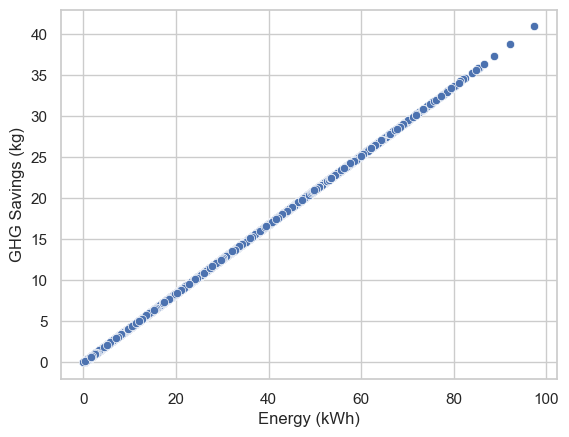

In [10]:
sns.scatterplot(x=data['Energy (kWh)'], y = data['GHG Savings (kg)'])
plt.show()

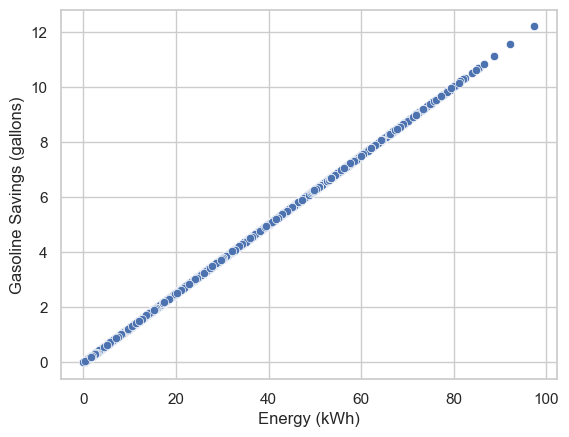

In [12]:
sns.scatterplot(x=data['Energy (kWh)'], y = data['Gasoline Savings (gallons)'])
plt.show()

GHG savings, Gasoline savings are almost perfectly correlated with Energy. Thus these columns can be ignored as they contain repetitive information.

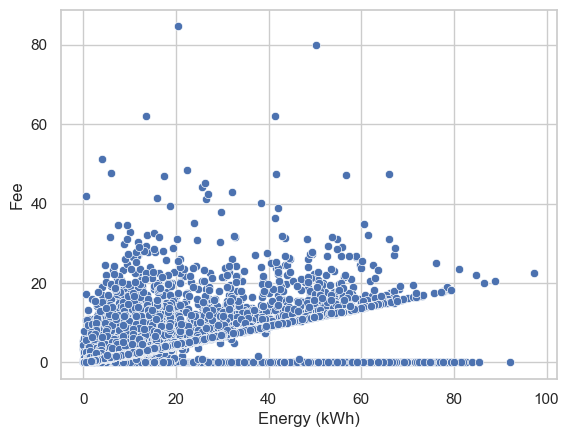

In [14]:
sns.scatterplot(x=data['Energy (kWh)'], y = data['Fee'])
plt.show()

There is no much correlation between Energy and Fee, but we can observe a few outliers!!

Checking for NULL values in the dataset

In [16]:
data.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [18]:
data['Port Type'].unique()

array(['Level 2', 'Level 1', nan], dtype=object)

In [19]:
data['Plug Type'].unique()

array(['J1772', 'NEMA 5-20R'], dtype=object)

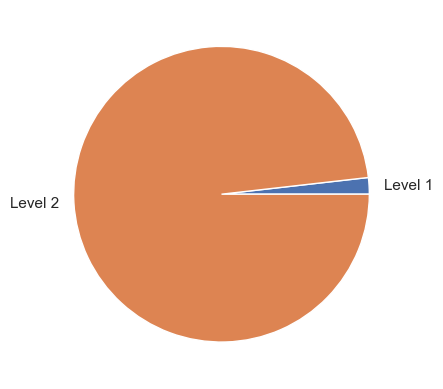

In [20]:
data.groupby('Port Type').size().plot(kind='pie')
plt.show()

### <center>Data Preprocessing</center>

The columns that will be removed with reasons: 
1. Energy, Gasoline Savings - These are perfectly correlated with GHG Savings and thus no point in using these columns to predict GHG savings.
2. City, State/Province, Country, Org Name - These columns have only a single value for all data points and thus not useful in analysis
3. MAC Address(of Electric charging equipment), Start Date, Start Time Zone, End Date, End Time Zone, Transaction Date, EVSE ID, Postal Code, Latitude, Longitude, Currency,Plug In Event Id, Driver Postal Code, System S/N - as the amount of GHG savings doesn't depend on these columns.

In [22]:
# redundant columns 
data.drop(['Energy (kWh)','Gasoline Savings (gallons)'],axis=1, inplace=True)

# columns all having all same value
data.drop(['Org Name','City','State/Province','Country'],axis=1,inplace=True)

# columns that doesn't impact GHG savings
data.drop(['MAC Address','Start Date','Start Time Zone','End Date','End Time Zone','Transaction Date (Pacific Time)',
              'Latitude','Longitude','Currency','Fee','Plug In Event Id','Postal Code','Driver Postal Code','User ID','EVSE ID','Address 1',
              'System S/N',],axis=1,inplace=True)

In [23]:
data.head()

,Station Name,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),GHG Savings (kg),Port Type,Port Number,Plug Type,Ended By,County,Model Number
0,PALO ALTO CA / HAMILTON #1,3:03:32,1:54:03,2.625,Level 2,2,J1772,Plug Out at Vehicle,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,0:02:06,0:01:54,0.045,Level 2,2,J1772,Customer,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,4:17:32,4:17:28,6.280,Level 2,2,J1772,Plug Out at Vehicle,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,2:03:24,2:02:58,3.007,Level 2,2,J1772,Customer,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,1:11:24,0:43:54,0.822,Level 2,2,J1772,Plug Out at Vehicle,NaN,NaN


In [25]:
data.isnull().sum()

Station Name                     0
Total Duration (hh:mm:ss)        0
Charging Time (hh:mm:ss)         0
GHG Savings (kg)                 0
Port Type                        9
Port Number                      0
Plug Type                        0
Ended By                       248
County                       84665
Model Number                 78948
dtype: int64

Replacing null values

In [27]:
mode_value = data['Ended By'].mode()
data['Ended By'].fillna(str(mode_value), inplace = True)

mode_value = data['Port Type'].mode()
data['Port Type'].fillna(str(mode_value), inplace=True)

mode_value = data['Model Number'].mode()
data['Model Number'].fillna(str(mode_value), inplace = True)

mode_value = data['County'].mode()
data['County'].fillna(str(mode_value), inplace = True)

Feature Transformation

Converting Total Duration and Charging Time from string to seconds

In [28]:
# function that converts time from string into seconds
def StringToSeconds(time):
    hours, minutes, seconds = map(int,time.split(':'))
    totalSeconds = hours*3600+minutes*60+seconds
    return totalSeconds

In [29]:
data['Charging Time (hh:mm:ss)'] = data['Charging Time (hh:mm:ss)'].apply(lambda t: StringToSeconds(t))
data['Total Duration (hh:mm:ss)'] = data['Total Duration (hh:mm:ss)'].apply(lambda t: StringToSeconds(t))

data[['Charging Time (hh:mm:ss)','Total Duration (hh:mm:ss)']]

,Charging Time (hh:mm:ss),Total Duration (hh:mm:ss)
0,6843,11012
1,114,126
2,15448,15452
3,7378,7404
4,2634,4284
...,...,...
259410,2118,2144
259411,8044,13381
259412,18492,62894
259413,14022,14734


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Station Name               259415 non-null  object 
 1   Total Duration (hh:mm:ss)  259415 non-null  int64  
 2   Charging Time (hh:mm:ss)   259415 non-null  int64  
 3   GHG Savings (kg)           259415 non-null  float64
 4   Port Type                  259415 non-null  object 
 5   Port Number                259415 non-null  int64  
 6   Plug Type                  259415 non-null  object 
 7   Ended By                   259415 non-null  object 
 8   County                     259415 non-null  object 
 9   Model Number               259415 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 19.8+ MB


The attributes Station Name, Port Type, Plug Type, Ended By, County and Model Number have non-numerical value. They need to be encoded into some numerical attributes


Encoding for nominal attributes

In [34]:
labelEncoder = preprocessing.LabelEncoder()
data[['Station Name','Port Type','Plug Type','Ended By','County','Model Number']] = data[['Station Name','Port Type','Plug Type','Ended By','County','Model Number']].apply(labelEncoder.fit_transform)
data.head()

,Station Name,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),GHG Savings (kg),Port Type,Port Number,Plug Type,Ended By,County,Model Number
0,12,11012,6843,2.625,2,2,0,12,0,0
1,12,126,114,0.045,2,2,0,2,0,0
2,12,15452,15448,6.280,2,2,0,12,0,0
3,12,7404,7378,3.007,2,2,0,2,0,0
4,12,4284,2634,0.822,2,2,0,12,0,0
